In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
runs = pd.read_csv('./Running.csv')


In [95]:
print(runs.columns)

Index(['Activity Type', 'Date', 'Favorite', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)',
       'Training Stress Score®', 'Avg Power', 'Max Power', 'Steps', 'Min Temp',
       'Decompression', 'Best Lap Time', 'Number of Laps', 'Max Temp',
       'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation'],
      dtype='object')


In [96]:
runs['Date'] = pd.to_datetime(runs['Date'])
runs['Avg Run Cadence'] = pd.to_numeric(runs['Avg Run Cadence'], errors='coerce')
runs['Max Run Cadence'] = pd.to_numeric(runs['Max Run Cadence'], errors='coerce')
runs['Avg Pace'] = runs['Avg Pace'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
runs['Date_ordinal']= runs['Date'].map(pd.Timestamp.toordinal)


<Axes: xlabel='Date'>

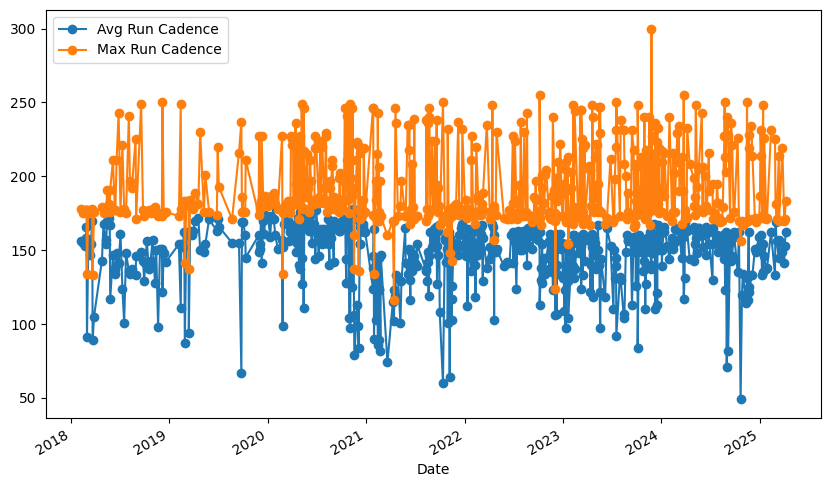

In [97]:
runs.plot(x='Date', y=['Avg Run Cadence', 'Max Run Cadence'], figsize=(10, 6), marker='o')

In [98]:
print(runs['Avg Run Cadence'].mean())

147.53140096618358


In [99]:
filtered_runs = runs[runs['Avg Pace'] <= 420]

In [100]:
avg_avg = filtered_runs['Avg Run Cadence'].mean()
print(avg_avg)

161.11371237458195


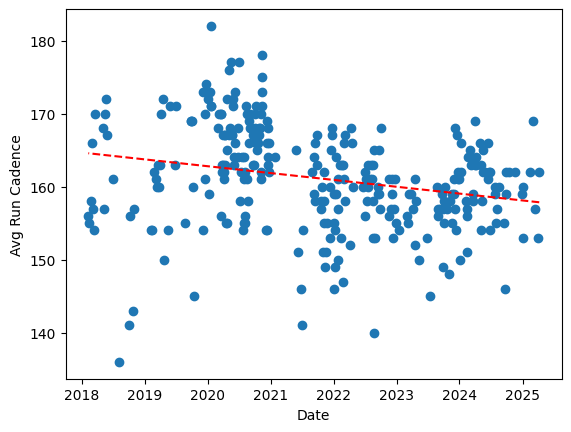

In [105]:
filtered_runs = filtered_runs.dropna(subset=['Date', 'Avg Run Cadence'])
plt.scatter(filtered_runs['Date'], filtered_runs['Avg Run Cadence'])
coeffs = np.polyfit(filtered_runs['Date_ordinal'], filtered_runs['Avg Run Cadence'], deg=1)
trendline = np.poly1d(coeffs)

# Plot trendline
plt.plot(filtered_runs['Date'], trendline(filtered_runs['Date_ordinal']), color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Avg Run Cadence')
plt.show()

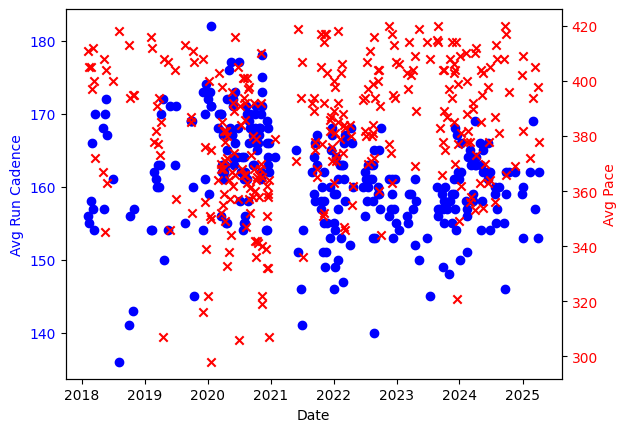

In [89]:
fig, ax1 = plt.subplots()

# First scatter plot (left y-axis)
ax1.scatter(filtered_runs['Date'], filtered_runs['Avg Run Cadence'], color='blue', label='Avg Cadence')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Run Cadence', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Second scatter plot (right y-axis)
ax2.scatter(filtered_runs['Date'], filtered_runs['Avg Pace'], color='red', marker='x', label='Avg Pace')
ax2.set_ylabel('Avg Pace', color='red')
ax2.tick_params(axis='y', labelcolor='red')



plt.show()

In [ ]:
avg_avg = filtered_runs['Avg Run Cadence'].mean()
print(avg_avg)

In [77]:
print(filtered_runs[filtered_runs['Date']< '2021-01-01']['Avg Run Cadence'].mean())


164.24812030075188


In [78]:
print(filtered_runs[filtered_runs['Date']> '2021-01-01']['Avg Run Cadence'].mean())

158.6024096385542
